In [2]:
# Code reference : https://github.com/dclambert/Python-ELM
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import k_means
from elm import ELMClassifier,SimpleELMClassifier
from random_hidden_layer import SimpleRandomHiddenLayer, RBFRandomHiddenLayer
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc

In [3]:
def res_dist(x, y, e,random_state=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

    start_time = time()

    e.fit(x_train, y_train)
    train_res=e.score(x_train, y_train)
    test_res= e.score(x_test, y_test)
        
    print ("\nTime: %.3f secs" % (time() - start_time))  
    print(classification_report(e.predict(x_test), y_test))
    print("Test Accuracy is", test_res)
    print("Train Accuracy is",train_res)
    plot_roc(y_test,e.predict(x_test))
    plot_confusion(y_test,e.predict(x_test))
    print()
    return (train_res, test_res)

In [4]:
def plot_roc(y_test, y_pred):
    fpr,tpr,ths = roc_curve(y_test, y_pred)
    auc_ = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='tab:blue',label='ROC curve (area = %0.2f)' % auc_)
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Plot')
    plt.legend()
    plt.show()

In [5]:
def plot_confusion(y_test, y_pred):
    
    C = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(C, annot=True, fmt='g')   
    labels = [0,1]
    cmap=sns.light_palette("tab:blue")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split

df=pd.read_csv('twitch_preprocessed_data.csv')
df = df.drop(columns=['Unnamed: 0'])
print(df.head())
x = df.drop(columns=['Source', 'Destination', 'Class'])
y = df[['Class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


   Source  Destination  Class  Page_Rank_Src  Page_Rank_Dst  Shortest_Path  \
0    6194          255      1            0.0       0.003192       0.000000   
1    6194          980      1            0.0       0.001034       0.590909   
2    6194         2992      1            0.0       0.001979       0.227273   
3    6194         2507      1            0.0       0.016213       0.136364   
4    6194          986      1            0.0       0.001616       0.500000   

   Followers_Src  Followees_Src  Followers_Dst  Followees_Dst  Int_Followers  \
0            0.0       0.011287       0.000000       0.009029            0.0   
1            0.0       0.011287       0.002415       0.036117            0.0   
2            0.0       0.011287       0.007246       0.000000            0.0   
3            0.0       0.011287       0.019324       0.031603            0.0   
4            0.0       0.011287       0.004831       0.047404            0.0   

   Int_Followees  
0       0.000000  
1       0.01

RBF Random Hidden Layer Tests
Gaussian Activation function

Time: 0.178 secs
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     11959
           1       0.87      0.98      0.92      9236

    accuracy                           0.93     21195
   macro avg       0.93      0.94      0.93     21195
weighted avg       0.94      0.93      0.93     21195

Test Accuracy is 0.9292757725878745
Train Accuracy is 0.9290437384991811


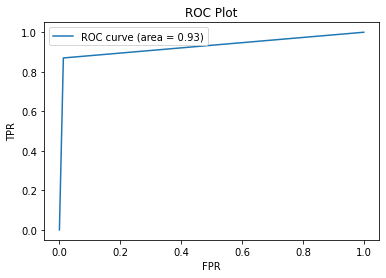

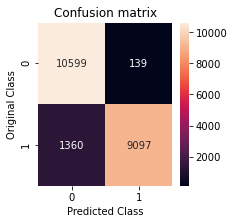


Poly Spline Activation function

Time: 0.188 secs
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     11848
           1       0.88      0.98      0.93      9347

    accuracy                           0.93     21195
   macro avg       0.93      0.94      0.93     21195
weighted avg       0.94      0.93      0.93     21195

Test Accuracy is 0.9343241330502478
Train Accuracy is 0.9333710796109437


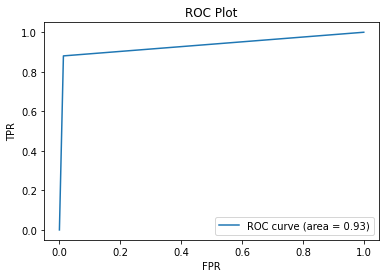

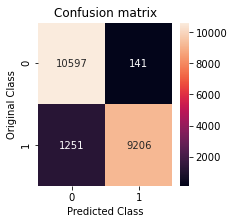


Multi Quadric Activation function

Time: 0.244 secs
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     11898
           1       0.88      0.98      0.93      9297

    accuracy                           0.93     21195
   macro avg       0.93      0.94      0.93     21195
weighted avg       0.94      0.93      0.93     21195

Test Accuracy is 0.9320594479830149
Train Accuracy is 0.9316118334580309


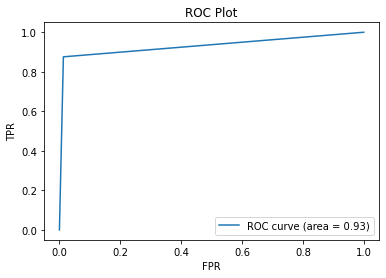

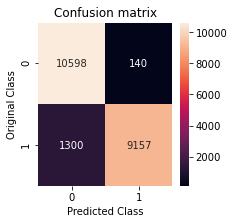

In [9]:
# RBF tests
print("RBF Random Hidden Layer Tests")
print("Gaussian Activation function")
elmc = ELMClassifier(RBFRandomHiddenLayer(activation_func='gaussian',gamma=0.1)) #gaussian activation function gives confusion matrix TN =0 if gamma is not given
tr,ts = res_dist(x, y, elmc,random_state=0)

print("Poly Spline Activation function")
elmc = ELMClassifier(RBFRandomHiddenLayer(activation_func='poly_spline', gamma=2))
tr,ts = res_dist(x, y, elmc,random_state=0)

print("Multi Quadric Activation function")
elmc = ELMClassifier(RBFRandomHiddenLayer(activation_func='multiquadric'))
tr,ts = res_dist(x, y, elmc,random_state=0)





0.9556346429943583 0.9547062986553433
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10930
           1       0.94      0.97      0.95     10265

    accuracy                           0.95     21195
   macro avg       0.95      0.96      0.95     21195
weighted avg       0.96      0.95      0.95     21195



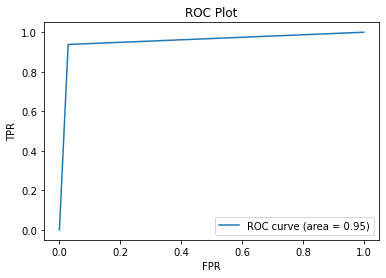

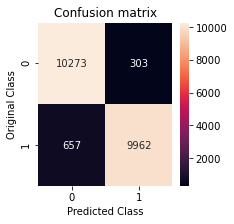

In [7]:
#Using Simple ELM Classifier - tanh activation function
elmc = SimpleELMClassifier(n_hidden=500)
elmc.fit(x_train, y_train)
print(elmc.score(x_train, y_train), elmc.score(x_test, y_test))
print(classification_report(elmc.predict(x_test), y_test))
plot_roc(y_test,elmc.predict(x_test))
plot_confusion(y_test,elmc.predict(x_test))

0.950943319919924 0.9504600141542817
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10890
           1       0.94      0.96      0.95     10305

    accuracy                           0.95     21195
   macro avg       0.95      0.95      0.95     21195
weighted avg       0.95      0.95      0.95     21195



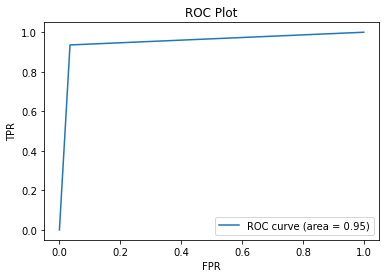

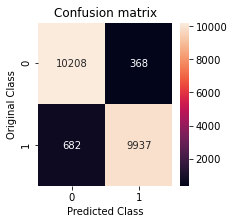

In [8]:
#Using Simple ELM Classifier with hardlim activation function
elmc = SimpleELMClassifier(n_hidden=500, activation_func='hardlim')
elmc.fit(x_train, y_train)
print(elmc.score(x_train, y_train), elmc.score(x_test, y_test))
print(classification_report(elmc.predict(x_test), y_test))
plot_roc(y_test,elmc.predict(x_test))
plot_confusion(y_test,elmc.predict(x_test))

0.9566861464420763 0.9565463552724699
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10923
           1       0.94      0.97      0.96     10272

    accuracy                           0.96     21195
   macro avg       0.96      0.96      0.96     21195
weighted avg       0.96      0.96      0.96     21195



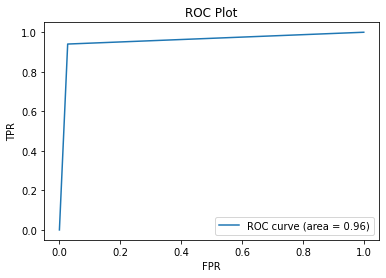

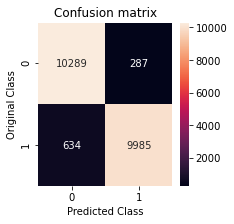

In [9]:
elmc = SimpleELMClassifier(n_hidden=500, activation_func='tribas')
elmc.fit(x_train, y_train)
print(elmc.score(x_train, y_train), elmc.score(x_test, y_test))
print(classification_report(elmc.predict(x_test), y_test))
plot_roc(y_test,elmc.predict(x_test))
plot_confusion(y_test,elmc.predict(x_test))

0.954097830263078 0.9522528898325077
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11020
           1       0.93      0.97      0.95     10175

    accuracy                           0.95     21195
   macro avg       0.95      0.95      0.95     21195
weighted avg       0.95      0.95      0.95     21195



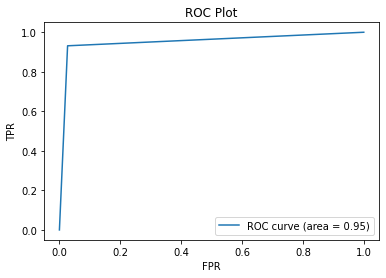

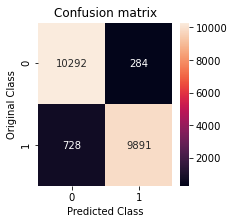

In [10]:
elmc = SimpleELMClassifier(n_hidden=500, activation_func='sine')
elmc.fit(x_train, y_train)
print(elmc.score(x_train, y_train), elmc.score(x_test, y_test))
print(classification_report(elmc.predict(x_test), y_test))
plot_roc(y_test,elmc.predict(x_test))
plot_confusion(y_test,elmc.predict(x_test))

0.9546235819869371 0.9534795942439255
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10992
           1       0.93      0.97      0.95     10203

    accuracy                           0.95     21195
   macro avg       0.95      0.95      0.95     21195
weighted avg       0.95      0.95      0.95     21195



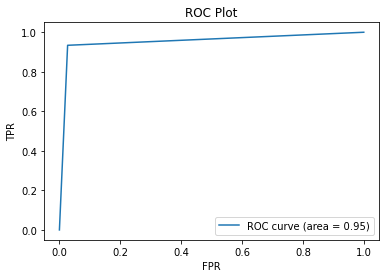

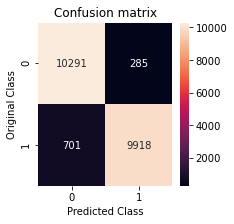

In [11]:
elmc = SimpleELMClassifier(n_hidden=500, activation_func='sigmoid')
elmc.fit(x_train, y_train)
print(elmc.score(x_train, y_train), elmc.score(x_test, y_test))
print(classification_report(elmc.predict(x_test), y_test))
plot_roc(y_test,elmc.predict(x_test))
plot_confusion(y_test,elmc.predict(x_test))